<a href="https://colab.research.google.com/github/DianaDoosti-PouyanBahmani/Intelligent_Systems_Final/blob/main/Task%202/final_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Mall_Customers.csv"
df = pd.read_csv(data_path)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
numeric_features.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

In [ ]:
print(numeric_features.columns)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

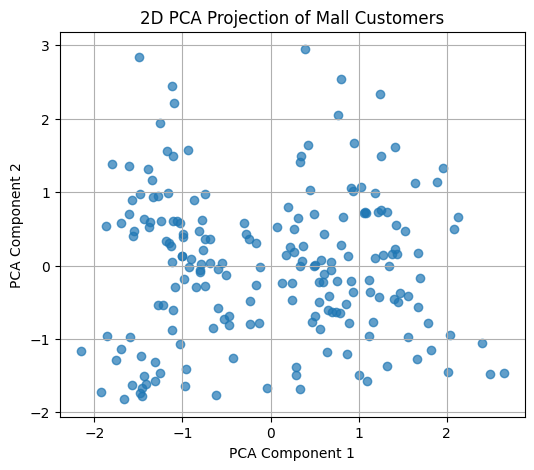

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Projection of Mall Customers")
plt.grid(True)
plt.show()

قسمت ب

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = range(2, 11)

inertias = []
silhouettes = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

results = pd.DataFrame({
    "K": list(Ks),
    "Inertia": inertias,
    "Silhouette": silhouettes
})

results

,K,Inertia,Silhouette
0,2,389.386189,0.335472
1,3,295.212246,0.357793
2,4,205.225147,0.403958
3,5,168.247580,0.416643
4,6,133.868334,0.427428
5,7,117.130608,0.418077
6,8,105.275723,0.426940
7,9,92.926043,0.419861
8,10,81.913836,0.398044


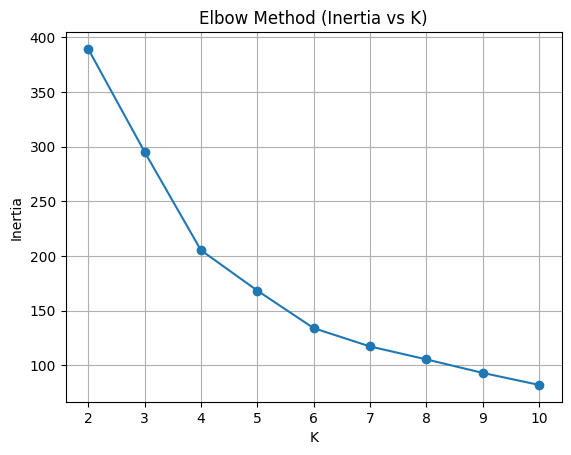

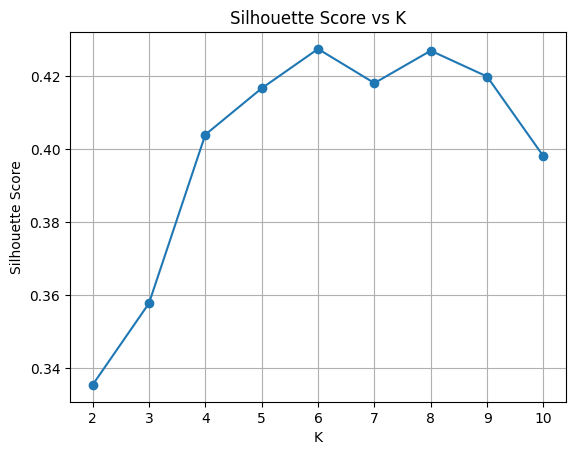

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(results["K"], results["Inertia"], marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method (Inertia vs K)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(results["K"], results["Silhouette"], marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()

قسمت ج

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkages = ["single", "complete", "average", "ward"]
Ks = range(2, 11)

results = []

for linkage in linkages:
    for k in Ks:
        if linkage == "ward":
            model = AgglomerativeClustering(
                n_clusters=k,
                linkage=linkage,
                metric="euclidean"
            )
        else:
            model = AgglomerativeClustering(
                n_clusters=k,
                linkage=linkage,
                metric="euclidean"
            )

        labels = model.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)

        results.append({
            "Linkage": linkage,
            "K": k,
            "Silhouette": score
        })

df_results = pd.DataFrame(results)
df_results

,Linkage,K,Silhouette
0,single,2,0.251371
1,single,3,0.161122
2,single,4,0.042500
3,single,5,0.003024
4,single,6,-0.042750
5,single,7,-0.045914
6,single,8,-0.046469
7,single,9,0.068781
8,single,10,0.040037
9,complete,2,0.233025


In [ ]:
best_per_linkage = (
    df_results
    .loc[df_results.groupby("Linkage")["Silhouette"].idxmax()]
    .reset_index(drop=True)
)

best_per_linkage

,Linkage,K,Silhouette
0,average,5,0.409569
1,complete,5,0.399982
2,single,2,0.251371
3,ward,6,0.420117


In [ ]:
best_overall = best_per_linkage.loc[
    best_per_linkage["Silhouette"].idxmax()
]

best_overall

,3
Linkage,ward
K,6
Silhouette,0.420117


قسمت د

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.2, 0.4, 0.6, 0.8, 1.0]
min_samples_values = [3, 5, 10]

results = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X_scaled)

        # تعداد خوشه‌ها (به‌جز نویز)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # نسبت نویز
        noise_ratio = np.sum(labels == -1) / len(labels)

        # silhouette فقط روی نقاط غیرنویز
        if n_clusters > 1 and np.sum(labels != -1) > 1:
            sil = silhouette_score(X_scaled[labels != -1],
                                    labels[labels != -1])
        else:
            sil = np.nan

        results.append({
            "eps": eps,
            "min_samples": min_s,
            "Clusters": n_clusters,
            "Noise Ratio": noise_ratio,
            "Silhouette": sil
        })

df_dbscan = pd.DataFrame(results)
df_dbscan

,eps,min_samples,Clusters,Noise Ratio,Silhouette
0,0.2,3,11,0.805,0.645880
1,0.2,5,1,0.975,NaN
2,0.2,10,0,1.000,NaN
3,0.4,3,10,0.295,0.442575
4,0.4,5,6,0.490,0.519023
5,0.4,10,2,0.850,0.766073
6,0.6,3,3,0.070,0.214881
7,0.6,5,2,0.140,0.273047
8,0.6,10,4,0.330,0.529589
9,0.8,3,1,0.015,NaN


In [ ]:
best_dbscan = df_dbscan.loc[df_dbscan["Silhouette"].idxmax()]
best_dbscan

,5
eps,0.400000
min_samples,10.000000
Clusters,2.000000
Noise Ratio,0.850000
Silhouette,0.766073


قسمت ه

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters_on_pca(X_pca, labels, title, filename):
    plt.figure(figsize=(7, 6))
    unique_labels = np.unique(labels)

    # نویز DBSCAN با برچسب -1
    if -1 in unique_labels:
        # ابتدا نقاط غیرنویز
        mask = labels != -1
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=labels[mask], alpha=0.8)
        plt.scatter(X_pca[~mask, 0], X_pca[~mask, 1], c='k', alpha=0.4, label='Noise (-1)')
        plt.legend()
    else:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.8)

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(filename, dpi=200)
    plt.show()

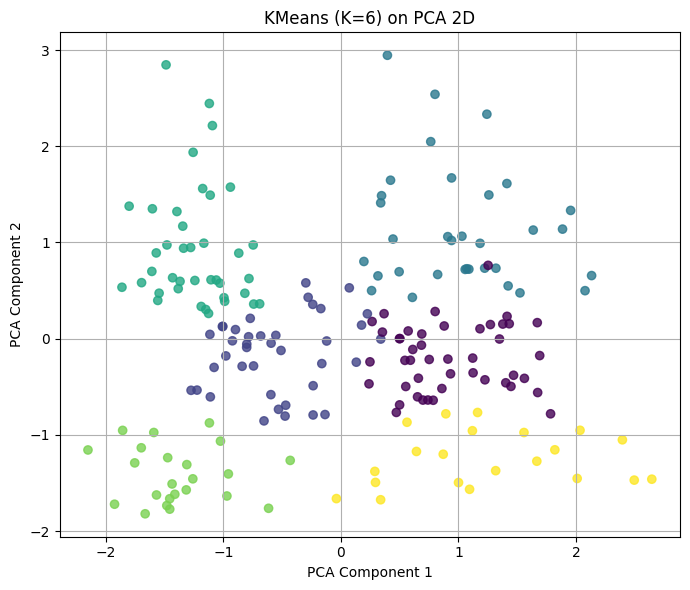

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

plot_clusters_on_pca(
    X_pca, labels_kmeans,
    "KMeans (K=6) on PCA 2D",
    "kmeans_pca.png"
)

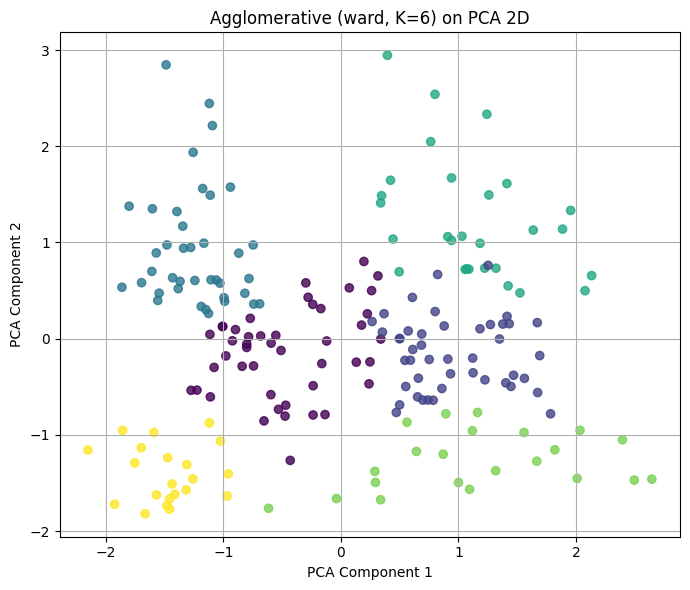

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6, linkage="ward", metric="euclidean")
labels_agg = agg.fit_predict(X_scaled)

plot_clusters_on_pca(
    X_pca, labels_agg,
    "Agglomerative (ward, K=6) on PCA 2D",
    "agg_ward_pca.png"
)

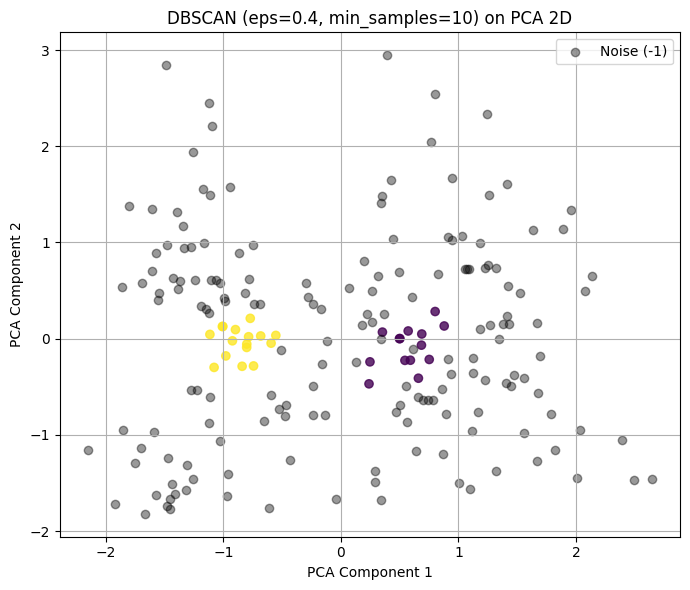

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=10)
labels_db = db.fit_predict(X_scaled)

plot_clusters_on_pca(
    X_pca, labels_db,
    "DBSCAN (eps=0.4, min_samples=10) on PCA 2D",
    "dbscan_pca.png"
)